## BBC News classification 

In [68]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import zipfile 

In [49]:
# Unzipping the train bbc news files
local_zip_train = zipfile.ZipFile("bbc-text.csv.zip")
local_zip_train.extractall("./")

In [50]:
# Opening the file train and test csv file 
with open("./bbc-text.csv",'r') as f:
    print(f"training examples : {f.readline()}")
    print(f"training examples : {f.readline()}")

training examples : category,text

training examples : tech,tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much

In [51]:
num_words = 1000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [52]:
stop_words = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
def remove_stop_words(sentences):
    sentences = sentences.lower()
    word = sentences.split()
    filtered_word = [i for i in word if i not in stop_words]
    sentences = " ".join(filtered_word)
    return sentences

remove_stop_words("I am about to go to the store and get any snack")

'go store get snack'

In [53]:
import csv
def parse_data(filename):
    with open(filename,'r') as reader:
        reader = csv.reader(reader,delimiter = ',')
        next(reader)
        labels = []
        sentences = []
        original_sentences = []
        for i in reader:
            original_sentences.append(i[1])
            cleaned_sentences = remove_stop_words(i[1])
            sentences.append(cleaned_sentences)
            labels.append(i[0])
            
        return sentences,labels,original_sentences
sentences,labels,original = parse_data("bbc-text.csv")
print(f"total sentences in the csv : {len(sentences)}")
print(f"total labels in the csv : {len(labels)}")

# Taking first example in the dataset 
print(f"first label example from the csv file :{labels[:1]}")
print(f"first removed_words sentences example from the csv file :{len(sentences[0])}")
print(f"first sentences example from the csv file :{len(original[0])}")
print(f"no.classes in the labels : {len(labels)}")

total sentences in the csv : 2225
total labels in the csv : 2225
first label example from the csv file :['tech']
first removed_words sentences example from the csv file :3054
first sentences example from the csv file :4333
no.classes in the labels : 2225


In [54]:
def train_test_split(training_size,sentences,labels):
    train_sentences = sentences[:training_size]
    train_labels = labels[:training_size]
    
    valid_sentences = sentences[training_size:]
    valid_labels = labels[training_size:]
    
    return train_sentences,train_labels,valid_sentences,valid_labels

train_sentences , train_labels , valid_sentences , valid_labels = train_test_split(1780,sentences,labels)

In [55]:
print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(valid_sentences)} sentences for validation.\n")
print(f"There are {len(valid_labels)} labels for validation.")

There are 1780 sentences for training.

There are 1780 labels for training.

There are 445 sentences for validation.

There are 445 labels for validation.


In [56]:
def fit_tokenizer(train_sentences):
    # Initializer Tokenizer 
    tokenizer = Tokenizer(num_words = 1000,oov_token = "<OOV>")
    # Fitting the tokenizer to the sentences
    tokenizer.fit_on_texts(train_sentences)
    
    return tokenizer

tokenizer = fit_tokenizer(train_sentences)
word_indexs = tokenizer.word_index
print(f"Total number of Word indexes : {len(word_indexs)} words")

Total number of Word indexes : 27285 words


In [59]:
def seq_and_pad(sentences,tokenizer):
    # Getting the sequenced sentences in the form of tokens
    sequence = tokenizer.texts_to_sequences(sentences)
    # Padding is included to get the uniformity 
    padding = pad_sequences(sequence,padding = 'post',maxlen = 120)
    return padding

In [60]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer)
val_padded_seq = seq_and_pad(valid_sentences, tokenizer)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (1780, 120)

Padded validation sequences have shape: (445, 120)


In [61]:
def tokenize_labels(labels,train_labels):
    # Initialize the tokenizer
    tokenizer = Tokenizer()
    # Use the tokenizer and fit on the text
    tokenizer.fit_on_texts(labels)
    # create the dictionary of words with index
    label_word_indx = tokenizer.word_index
    # Create the sequences for the labels
    label_sequence = tokenizer.texts_to_sequences(train_labels)
    # Padding to make uniform length
    label_padding = pad_sequences(label_sequence,padding = 'post')
    return label_padding

In [62]:
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, valid_labels)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[4]
 [2]
 [1]
 [1]
 [5]]

First 5 labels of the validation set should look like this:
[[5]
 [4]
 [3]
 [1]
 [1]]

Tokenized labels of the training set have shape: (1780, 1)

Tokenized labels of the validation set have shape: (445, 1)



In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

def create_model(num_words,embedding_dim,maxlen):
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [64]:
model = create_model(num_words,embedding_dim,max_length)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
__________________________________________________

In [65]:
history = model.fit(train_padded_seq,train_label_seq,epochs = 30 ,validation_data = (val_padded_seq,val_label_seq))

Epoch 1/30
56/56 [==============================] - 4s 11ms/step - loss: 1.7645 - accuracy: 0.3292 - val_loss: 1.7307 - val_accuracy: 0.2966
Epoch 2/30
56/56 [==============================] - 0s 4ms/step - loss: 1.6905 - accuracy: 0.2775 - val_loss: 1.6470 - val_accuracy: 0.3618
Epoch 3/30
56/56 [==============================] - 0s 4ms/step - loss: 1.6047 - accuracy: 0.3848 - val_loss: 1.5618 - val_accuracy: 0.4382
Epoch 4/30
56/56 [==============================] - 0s 4ms/step - loss: 1.5069 - accuracy: 0.4343 - val_loss: 1.4629 - val_accuracy: 0.4382
Epoch 5/30
56/56 [==============================] - 0s 4ms/step - loss: 1.3751 - accuracy: 0.4584 - val_loss: 1.3146 - val_accuracy: 0.5326
Epoch 6/30
56/56 [==============================] - 0s 4ms/step - loss: 1.2024 - accuracy: 0.6275 - val_loss: 1.1410 - val_accuracy: 0.6854
Epoch 7/30
56/56 [==============================] - 0s 4ms/step - loss: 1.0215 - accuracy: 0.7388 - val_loss: 0.9767 - val_accuracy: 0.7978
Epoch 8/30
56/56 [=

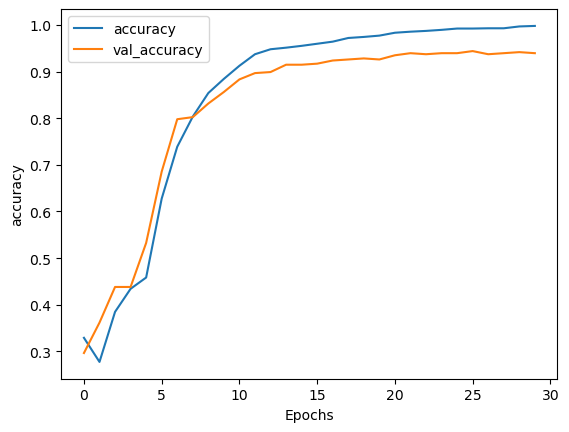

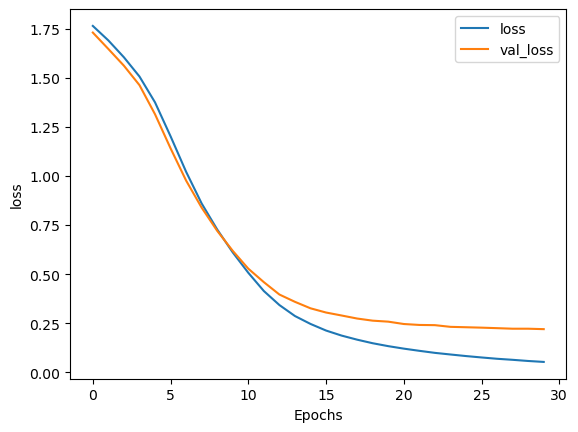

In [69]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")